# **Importing relevante libraries:**

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

**Creating an array using the photo's paths in File2**

In [2]:
File=[]
for dirname, _, filenames in os.walk('../input/animal10/Animals-10'):
    for filename in filenames:
        File+=[os.path.join(dirname, filename)]
        
File2=[]
for file in File:
    if file[-5:]=='.jpeg':
        File2+=[file]  

**animalsNames array contains animals names taken from the dataset's folders names**

In [3]:
path = '../input/animal10/Animals-10'
animalsNames = os.listdir(path)
animalsNames.sort()


In [4]:
dir0='../input/animal10/Animals-10/butterfly'
dir1='../input/animal10/Animals-10/cat'
dir2='../input/animal10/Animals-10/chicken'
dir3='../input/animal10/Animals-10/cow'
dir4='../input/animal10/Animals-10/dog'
dir5='../input/animal10/Animals-10/elephant'
dir6='../input/animal10/Animals-10/horse'
dir7='../input/animal10/Animals-10/sheep'
dir8='../input/animal10/Animals-10/spider'
dir9='../input/animal10/Animals-10/squirrel'

**Creating a dictionary called "myDict" with animals names as keys and ordered ids as values**

In [5]:
Dirs=[ dir0,dir1,dir2,dir3,dir4,dir5,dir6,dir7,dir8,dir9 ]
myDict={ animalsNames[0]:0,animalsNames[1]:1,animalsNames[2]:2,animalsNames[3]:3,animalsNames[4]:4,animalsNames[5]:5,animalsNames[6]:6,animalsNames[7]:7,animalsNames[8]:8,animalsNames[9]:9 }

# Making dataset and testset
**This part takes a while...**

In [6]:
dataset=[]
testset=[]
count=0
for dirs in Dirs:
    i=0
    for file in File2:
        if dirs in file:
            image=load_img(file, grayscale=False, color_mode='rgb', target_size=(100,100))
            image=img_to_array(image)
            image=image/255.0
            if i<1000:
                dataset.append([image,count])
                i+=1
            else:
                testset.append([image,count])
    count=count+1

**Seperating the dataset's and testset's elements to tuples of data and label**

In [7]:
data0,labels0=zip(*dataset)
test0,labelsTest0=zip(*testset)

**Trasfering (data,label) arrays to binary matrix**

In [8]:
labels1=to_categorical(labels0)
labels=np.array(labels1)
data=np.array(data0)
print("Data Shape:{}\nDataLabels shape: {}".format(data.shape,labels.shape))

Data Shape:(10000, 100, 100, 3)
DataLabels shape: (10000, 10)


# Prepering data for traning

In [9]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [10]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(8000, 100, 100, 3)
(2000, 100, 100, 3)
(8000, 10)
(2000, 10)


In [11]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

**Using tensor flow to generate pretrained model using MobileNetV2**

In [12]:
pretrained_model = tf.keras.applications.MobileNetV2(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model.trainable = False

9412608/9406464 [==============================] - 0s 0us/step


**Starting from input, we chain layer calls to specify the model's forward pass, and finally we create our model from inputs and outputs:**

In [13]:
inputs = pretrained_model.input
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

**Config the model with losses and metrics**

In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Train

In [15]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=30)

Epoch 1/30
250/250 [==============================] - 25s 78ms/step - loss: 1.6108 - accuracy: 0.4862 - val_loss: 0.7193 - val_accuracy: 0.7645
Epoch 2/30
250/250 [==============================] - 18s 73ms/step - loss: 0.9625 - accuracy: 0.6750 - val_loss: 0.7038 - val_accuracy: 0.7655
Epoch 3/30
250/250 [==============================] - 18s 70ms/step - loss: 0.9251 - accuracy: 0.6842 - val_loss: 0.6479 - val_accuracy: 0.7755
Epoch 4/30
250/250 [==============================] - 18s 74ms/step - loss: 0.8714 - accuracy: 0.7050 - val_loss: 0.7189 - val_accuracy: 0.7570
Epoch 5/30
250/250 [==============================] - 19s 74ms/step - loss: 0.8539 - accuracy: 0.7106 - val_loss: 0.6432 - val_accuracy: 0.7790
Epoch 6/30
250/250 [==============================] - 18s 73ms/step - loss: 0.8034 - accuracy: 0.7325 - val_loss: 0.6721 - val_accuracy: 0.7820
Epoch 7/30
250/250 [==============================] - 19s 74ms/step - loss: 0.7758 - accuracy: 0.7300 - val_loss: 0.6563 - val_accuracy:

# Prediction

In [16]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       188
           1       0.91      0.73      0.81       200
           2       0.87      0.90      0.88       207
           3       0.70      0.75      0.72       174
           4       0.76      0.72      0.74       210
           5       0.77      0.88      0.82       202
           6       0.80      0.72      0.76       220
           7       0.70      0.81      0.75       221
           8       0.94      0.81      0.87       180
           9       0.78      0.83      0.80       198

    accuracy                           0.80      2000
   macro avg       0.81      0.80      0.81      2000
weighted avg       0.81      0.80      0.80      2000



# Traning vs validation accuracy graph

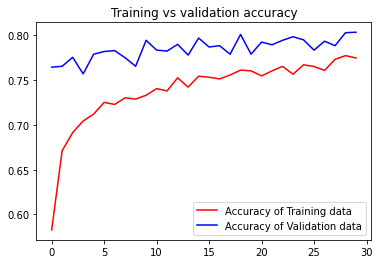

<Figure size 432x288 with 0 Axes>

In [17]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

# Traning vs validation loss graph

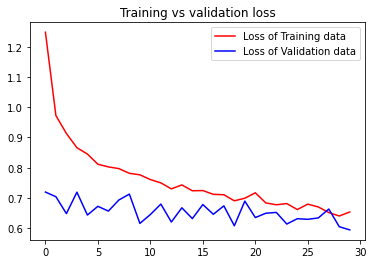

<Figure size 432x288 with 0 Axes>

In [18]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

**Loading and presenting image to test**

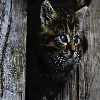

In [19]:
load_img("../input/animal10/Animals-10/cat/cat (10).jpg",target_size=(100,100))

In [20]:
image=load_img("../input/animal10/Animals-10/cat/cat (10).jpg",target_size=(100,100))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

# Prediction result:

In [21]:
reverse_mapping={ 0:animalsNames[0],1:animalsNames[1],2:animalsNames[2],3:animalsNames[3],4:animalsNames[4],5:animalsNames[5],6:animalsNames[6],7:animalsNames[7],8:animalsNames[8],9:animalsNames[9] }

def mapper(value):
    return reverse_mapping[value]

pred=model.predict(prediction_image)
value=np.argmax(pred)
name0=mapper(value)

print("Prediction is {}.".format(name0))

Prediction is cat.


In [22]:
test=np.array(test0)
pred2=model.predict(test)

PRED=[]
for item in pred2:
    value2=np.argmax(item)      
    PRED+=[value2]
    
print(pred2.shape)

(14209, 10)


In [23]:
ANS=list(labelsTest0)

In [24]:
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.7998451685551411
